In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [42]:
income = pd.Series([100,110,200,45], index=['WA','NV','CA','IA'])
taxes  = pd.Series([20,50,25,5], index=['IA','CA','NV','WA']) # diff order
print(income)
print(taxes)

WA    100
NV    110
CA    200
IA     45
dtype: int64
IA    20
CA    50
NV    25
WA     5
dtype: int64


In [49]:
income.reset_index(drop = True) - taxes.reset_index(drop = True)

0     80
1     60
2    175
3     40
dtype: int64

In [45]:
income - taxes

CA    150
IA     25
NV     85
WA     95
dtype: int64

In [4]:
df_cars = pd.read_csv("data/cars.csv")

In [5]:
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [6]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv")
df_uber.head()

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,07/01/2014,09:00 AM,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,07/01/2014,09:30 AM,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned


In [7]:
df_uber["Date"]

0     07/01/2014
1     07/01/2014
2     07/01/2014
3     07/01/2014
4     07/01/2014
         ...    
94    07/21/2014
95    07/21/2014
96    07/21/2014
97    07/21/2014
98    07/22/2014
Name: Date, Length: 99, dtype: object

In [8]:
df_uber["Status"]

0     Cancelled
1       Arrived
2      Assigned
3      Assigned
4      Assigned
        ...    
94     Assigned
95    Cancelled
96      Arrived
97     Assigned
98      Arrived
Name: Status, Length: 99, dtype: object

In [9]:
df_cars.columns

Index(['MPG', 'CYL', 'ENG', 'WGT'], dtype='object')

In [10]:
len(df_cars)

392

In [11]:
df_cars["WGT"].mean()

2977.5841836734694

In [12]:
df_cars["CYL"].median()

4.0

In [13]:
df_cars["ENG"] / df_cars["CYL"]

0      38.375
1      43.750
2      39.750
3      38.000
4      37.750
        ...  
387    35.000
388    24.250
389    33.750
390    30.000
391    29.750
Length: 392, dtype: float64

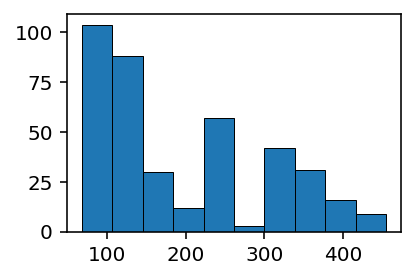

In [14]:
fig, ax = plt.subplots(figsize = (3, 2))

n, bins, hpatches = ax.hist(df_cars["ENG"])

for patch in hpatches: 
    patch.set_linewidth(.5)
    patch.set_edgecolor('black')

plt.show()

In [15]:
yrs = pd.Series([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000])
yrs

0    1991
1    1992
2    1993
3    1994
4    1995
5    1996
6    1997
7    1998
8    1999
9    2000
dtype: int64

In [16]:
len(yrs)

10

In [17]:
yrs[yrs < 1997]

0    1991
1    1992
2    1993
3    1994
4    1995
5    1996
dtype: int64

In [18]:
print(yrs[yrs < 1997])

0    1991
1    1992
2    1993
3    1994
4    1995
5    1996
dtype: int64


In [19]:
print(yrs * 0.2 + yrs)

0    2389.2
1    2390.4
2    2391.6
3    2392.8
4    2394.0
5    2395.2
6    2396.4
7    2397.6
8    2398.8
9    2400.0
dtype: float64


In [120]:
yrs = pd.Series([1991, 1992, 1993, 1994, 1995, np.nan, 1997, 1998, 1999, 2000])
yrs[~yrs.isnull()]

0    1991.0
1    1992.0
2    1993.0
3    1994.0
4    1995.0
6    1997.0
7    1998.0
8    1999.0
9    2000.0
dtype: float64

In [121]:
yrs.count()

9

In [123]:
a = yrs.to_frame()
a

,0
0,1991.0
1,1992.0
2,1993.0
3,1994.0
4,1995.0
5,NaN
6,1997.0
7,1998.0
8,1999.0
9,2000.0


In [ ]:
a.columns = np.array(["Hi"])
a['Hi'] = a['Hi'].fillna(a['Hi'].median())
a

In [23]:
np.corrcoef(df_cars["WGT"], df_cars["MPG"])

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

In [24]:
np.corrcoef(df_cars[df_cars["CYL"] == 8]["WGT"], df_cars[df_cars["CYL"] == 8]["MPG"])


array([[ 1.        , -0.55690993],
       [-0.55690993,  1.        ]])

In [25]:
[ np.corrcoef(df_cars[df_cars["CYL"] == i]["WGT"], df_cars[df_cars["CYL"] == i]["MPG"]) for i in df_cars["CYL"].unique()]

[array([[ 1.        , -0.55690993],
        [-0.55690993,  1.        ]]),
 array([[ 1.        , -0.53570819],
        [-0.53570819,  1.        ]]),
 array([[ 1.        , -0.46316257],
        [-0.46316257,  1.        ]]),
 array([[1.        , 0.61916842],
        [0.61916842, 1.        ]]),
 array([[ 1.        , -0.04750808],
        [-0.04750808,  1.        ]])]

In [26]:
df_cars["ENG2WGT"] = df_cars["ENG"] / df_cars["WGT"]

In [27]:
df_cars

,MPG,CYL,ENG,WGT,ENG2WGT
0,18.0,8,307.0,3504,0.087614
1,15.0,8,350.0,3693,0.094774
2,18.0,8,318.0,3436,0.092549
3,16.0,8,304.0,3433,0.088552
4,17.0,8,302.0,3449,0.087562
...,...,...,...,...,...
387,27.0,4,140.0,2790,0.050179
388,44.0,4,97.0,2130,0.045540
389,32.0,4,135.0,2295,0.058824
390,28.0,4,120.0,2625,0.045714


In [28]:
df_uber[["Time", "Status", "PU_Address"]]

,Time,Status,PU_Address
0,07:15 AM,Cancelled,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;"
1,07:30 AM,Arrived,"33 Robert Dr., Short Hills NJ;"
2,08:00 AM,Assigned,"60 Glenmore Ave., BK NY;"
3,09:00 AM,Assigned,"128 East 31 St., BK NY;"
4,09:30 AM,Assigned,"139-39 35 Ave., Flushing NY;"
...,...,...,...
94,06:00 AM,Assigned,"266 prospect park west, brooklyn NY;"
95,08:30 AM,Cancelled,"42 St., BK NY;"
96,12:00 PM,Arrived,"663 51st Street, BK NY;"
97,04:45 PM,Assigned,"255 Fieldston Terrace, Bronx NY;"


In [29]:
#using loc
df_uber.loc[:, ["Time", "Status", "PU_Address"]]

,Time,Status,PU_Address
0,07:15 AM,Cancelled,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;"
1,07:30 AM,Arrived,"33 Robert Dr., Short Hills NJ;"
2,08:00 AM,Assigned,"60 Glenmore Ave., BK NY;"
3,09:00 AM,Assigned,"128 East 31 St., BK NY;"
4,09:30 AM,Assigned,"139-39 35 Ave., Flushing NY;"
...,...,...,...
94,06:00 AM,Assigned,"266 prospect park west, brooklyn NY;"
95,08:30 AM,Cancelled,"42 St., BK NY;"
96,12:00 PM,Arrived,"663 51st Street, BK NY;"
97,04:45 PM,Assigned,"255 Fieldston Terrace, Bronx NY;"


In [30]:
df_uber = df_uber.set_index("Time")

In [31]:
df_uber.iloc[10:16]

,Date,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
Time,,,,,,
08:00 PM,07/01/2014,"35-36 32 St., Astoria NY;","1342 St. Johns Pl., BK NY;","PU: 35-36 32 St., Astoria NY; DO: 1342 St. Joh...","35-36 32 St., Astoria NY; DO: 1342 St. Johns P...",Assigned
03:30 AM,07/02/2014,"862 East 21 Street, BK NY;",La Guardia Airport;,"PU: 862 East 21 Street, BK NY; DO: La Guardia ...","862 East 21 Street, BK NY; DO: La Guardia Airp...",Arrived
02:00 PM,07/02/2014,"1539 71st Street, BK NY;","54 Watts Street, NY NY;","PU: 1539 71st Street, BK NY; DO: 54 Watts Stre...","1539 71st Street, BK NY; DO: 54 Watts Street, ...",Assigned
03:00 PM,07/02/2014,"208 Elmwood ave, BK NY;",John F Kennedy International Airport;,"PU: 208 Elmwood ave, BK NY; DO: John F Kennedy...","208 Elmwood ave, BK NY; DO: John F Kennedy Int...",Arrived
08:45 PM,07/02/2014,"543 1 St., BK NY;",John F Kennedy International Airport;,"PU: 543 1 St., BK NY; DO: John F Kennedy Inter...","543 1 St., BK NY; DO: John F Kennedy Internati...",Arrived
05:00 AM,07/03/2014,513 Montgomery StreetBK NY;,John F Kennedy International Airport;,PU: 513 Montgomery StreetBK NY; DO: John F Ken...,513 Montgomery StreetBK NY; DO: John F Kennedy...,Arrived


In [32]:
df_uber.loc['07:30 AM']["PU_Address"]

Time
07:30 AM                       33 Robert Dr., Short Hills NJ;
07:30 AM    John F Kennedy International Airport, JetBlue ...
07:30 AM                           1123 Albemarle Rd., BK NY;
Name: PU_Address, dtype: object

In [33]:
df_uber.reset_index()

,Time,Date,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07:15 AM,07/01/2014,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07:30 AM,07/01/2014,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,08:00 AM,07/01/2014,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,09:00 AM,07/01/2014,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,09:30 AM,07/01/2014,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned
...,...,...,...,...,...,...,...
94,06:00 AM,07/21/2014,"266 prospect park west, brooklyn NY;",jfk ;,"PU: 266 prospect park west, brooklyn NY; DO: j...","266 prospect park west, brooklyn NY; DO: jfk ;",Assigned
95,08:30 AM,07/21/2014,"42 St., BK NY;",JFK Hotel ;,"PU: 42 St., BK NY; DO: JFK Hotel ;","42 St., BK NY; DO: JFK Hotel ;",Cancelled
96,12:00 PM,07/21/2014,"663 51st Street, BK NY;",La Guardia Airport;,"PU: 663 51st Street, BK NY; DO: La Guardia Air...","663 51st Street, BK NY; DO: La Guardia Airport;",Arrived
97,04:45 PM,07/21/2014,"255 Fieldston Terrace, Bronx NY;",La Guardia Airport;,"PU: 255 Fieldston Terrace, Bronx NY; DO: La Gu...","255 Fieldston Terrace, Bronx NY; DO: La Guardi...",Assigned


In [34]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv", 
                     parse_dates = ["Date", 'Time'], 
                     dtype = {'Status': 'category'})

In [35]:
df_uber

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,2020-09-24 07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,2020-09-24 07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,2014-07-01,2020-09-24 08:00:00,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,2014-07-01,2020-09-24 09:00:00,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,2014-07-01,2020-09-24 09:30:00,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned
...,...,...,...,...,...,...,...
94,2014-07-21,2020-09-24 06:00:00,"266 prospect park west, brooklyn NY;",jfk ;,"PU: 266 prospect park west, brooklyn NY; DO: j...","266 prospect park west, brooklyn NY; DO: jfk ;",Assigned
95,2014-07-21,2020-09-24 08:30:00,"42 St., BK NY;",JFK Hotel ;,"PU: 42 St., BK NY; DO: JFK Hotel ;","42 St., BK NY; DO: JFK Hotel ;",Cancelled
96,2014-07-21,2020-09-24 12:00:00,"663 51st Street, BK NY;",La Guardia Airport;,"PU: 663 51st Street, BK NY; DO: La Guardia Air...","663 51st Street, BK NY; DO: La Guardia Airport;",Arrived
97,2014-07-21,2020-09-24 16:45:00,"255 Fieldston Terrace, Bronx NY;",La Guardia Airport;,"PU: 255 Fieldston Terrace, Bronx NY; DO: La Gu...","255 Fieldston Terrace, Bronx NY; DO: La Guardi...",Assigned


In [36]:
df_uber = df_uber.set_index("Time")
df_uber

,Date,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
Time,,,,,,
2020-09-24 07:15:00,2014-07-01,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
2020-09-24 07:30:00,2014-07-01,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2020-09-24 08:00:00,2014-07-01,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
2020-09-24 09:00:00,2014-07-01,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
2020-09-24 09:30:00,2014-07-01,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned
...,...,...,...,...,...,...
2020-09-24 06:00:00,2014-07-21,"266 prospect park west, brooklyn NY;",jfk ;,"PU: 266 prospect park west, brooklyn NY; DO: j...","266 prospect park west, brooklyn NY; DO: jfk ;",Assigned
2020-09-24 08:30:00,2014-07-21,"42 St., BK NY;",JFK Hotel ;,"PU: 42 St., BK NY; DO: JFK Hotel ;","42 St., BK NY; DO: JFK Hotel ;",Cancelled
2020-09-24 12:00:00,2014-07-21,"663 51st Street, BK NY;",La Guardia Airport;,"PU: 663 51st Street, BK NY; DO: La Guardia Air...","663 51st Street, BK NY; DO: La Guardia Airport;",Arrived


In [37]:
df_uber.loc['2020-09-23 07:15:00']["PU_Address"]

Series([], Name: PU_Address, dtype: object)

In [38]:
df_uber = df_uber.reset_index()

In [39]:
df_uber["Year"] = df_uber["Time"].dt.year

In [40]:
df_uber

,Time,Date,PU_Address,DO_Address,Routing Details,PU_Address.1,Status,Year
0,2020-09-24 07:15:00,2014-07-01,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled,2020
1,2020-09-24 07:30:00,2014-07-01,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived,2020
2,2020-09-24 08:00:00,2014-07-01,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned,2020
3,2020-09-24 09:00:00,2014-07-01,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned,2020
4,2020-09-24 09:30:00,2014-07-01,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned,2020
...,...,...,...,...,...,...,...,...
94,2020-09-24 06:00:00,2014-07-21,"266 prospect park west, brooklyn NY;",jfk ;,"PU: 266 prospect park west, brooklyn NY; DO: j...","266 prospect park west, brooklyn NY; DO: jfk ;",Assigned,2020
95,2020-09-24 08:30:00,2014-07-21,"42 St., BK NY;",JFK Hotel ;,"PU: 42 St., BK NY; DO: JFK Hotel ;","42 St., BK NY; DO: JFK Hotel ;",Cancelled,2020
96,2020-09-24 12:00:00,2014-07-21,"663 51st Street, BK NY;",La Guardia Airport;,"PU: 663 51st Street, BK NY; DO: La Guardia Air...","663 51st Street, BK NY; DO: La Guardia Airport;",Arrived,2020
97,2020-09-24 16:45:00,2014-07-21,"255 Fieldston Terrace, Bronx NY;",La Guardia Airport;,"PU: 255 Fieldston Terrace, Bronx NY; DO: La Gu...","255 Fieldston Terrace, Bronx NY; DO: La Guardi...",Assigned,2020


In [41]:
df_cars.groupby("CYL").apply(lambda x: (x["MPG"] / x["ENG"]).mean() )

CYL
3    0.283973
4    0.282160
5    0.198195
6    0.095086
8    0.044567
dtype: float64

In [50]:
df_status = df_uber.copy()

In [57]:
df_status["junk"] = [99, 100]
df_status

ValueError: Length of values (2) does not match length of index (99)

In [58]:
df_cars

,MPG,CYL,ENG,WGT,ENG2WGT
0,18.0,8,307.0,3504,0.087614
1,15.0,8,350.0,3693,0.094774
2,18.0,8,318.0,3436,0.092549
3,16.0,8,304.0,3433,0.088552
4,17.0,8,302.0,3449,0.087562
...,...,...,...,...,...
387,27.0,4,140.0,2790,0.050179
388,44.0,4,97.0,2130,0.045540
389,32.0,4,135.0,2295,0.058824
390,28.0,4,120.0,2625,0.045714


In [63]:
df_cars.loc[4]['ENG']

302.0

In [64]:
df_uber

,Time,Date,PU_Address,DO_Address,Routing Details,PU_Address.1,Status,Year
0,2020-09-24 07:15:00,2014-07-01,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled,2020
1,2020-09-24 07:30:00,2014-07-01,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived,2020
2,2020-09-24 08:00:00,2014-07-01,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned,2020
3,2020-09-24 09:00:00,2014-07-01,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned,2020
4,2020-09-24 09:30:00,2014-07-01,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned,2020
...,...,...,...,...,...,...,...,...
94,2020-09-24 06:00:00,2014-07-21,"266 prospect park west, brooklyn NY;",jfk ;,"PU: 266 prospect park west, brooklyn NY; DO: j...","266 prospect park west, brooklyn NY; DO: jfk ;",Assigned,2020
95,2020-09-24 08:30:00,2014-07-21,"42 St., BK NY;",JFK Hotel ;,"PU: 42 St., BK NY; DO: JFK Hotel ;","42 St., BK NY; DO: JFK Hotel ;",Cancelled,2020
96,2020-09-24 12:00:00,2014-07-21,"663 51st Street, BK NY;",La Guardia Airport;,"PU: 663 51st Street, BK NY; DO: La Guardia Air...","663 51st Street, BK NY; DO: La Guardia Airport;",Arrived,2020
97,2020-09-24 16:45:00,2014-07-21,"255 Fieldston Terrace, Bronx NY;",La Guardia Airport;,"PU: 255 Fieldston Terrace, Bronx NY; DO: La Gu...","255 Fieldston Terrace, Bronx NY; DO: La Guardi...",Assigned,2020


In [69]:
df_uber['n'] = df_uber["PU_Address"].apply(len)
df_uber

,Time,Date,PU_Address,DO_Address,Routing Details,PU_Address.1,Status,Year,n
0,2020-09-24 07:15:00,2014-07-01,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled,2020,42
1,2020-09-24 07:30:00,2014-07-01,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived,2020,30
2,2020-09-24 08:00:00,2014-07-01,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned,2020,24
3,2020-09-24 09:00:00,2014-07-01,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned,2020,23
4,2020-09-24 09:30:00,2014-07-01,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned,2020,28
...,...,...,...,...,...,...,...,...,...
94,2020-09-24 06:00:00,2014-07-21,"266 prospect park west, brooklyn NY;",jfk ;,"PU: 266 prospect park west, brooklyn NY; DO: j...","266 prospect park west, brooklyn NY; DO: jfk ;",Assigned,2020,36
95,2020-09-24 08:30:00,2014-07-21,"42 St., BK NY;",JFK Hotel ;,"PU: 42 St., BK NY; DO: JFK Hotel ;","42 St., BK NY; DO: JFK Hotel ;",Cancelled,2020,14
96,2020-09-24 12:00:00,2014-07-21,"663 51st Street, BK NY;",La Guardia Airport;,"PU: 663 51st Street, BK NY; DO: La Guardia Air...","663 51st Street, BK NY; DO: La Guardia Airport;",Arrived,2020,23
97,2020-09-24 16:45:00,2014-07-21,"255 Fieldston Terrace, Bronx NY;",La Guardia Airport;,"PU: 255 Fieldston Terrace, Bronx NY; DO: La Gu...","255 Fieldston Terrace, Bronx NY; DO: La Guardi...",Assigned,2020,32


In [91]:
df = pd.read_csv("data/GODT.csv")

In [92]:
df

,country,year,population,donations
0,Afghanistan,2009,28.2,0
1,Afghanistan,2010,29.1,0
2,Afghanistan,2011,32.4,0
3,Afghanistan,2012,33.4,0
4,Afghanistan,2013,30.6,0
...,...,...,...,...
1593,Venezuela (Bolivarian Republic of),2019,32.8,12
1594,Australia,2019,25.1,5485
1595,India,2019,1368.7,27994
1596,China,2019,1428.2,61431


In [98]:
len(df[(df["donations"] >= 5) & (df["donations"] <= 10)])

25

In [99]:
df.groupby("year").mean()

,population,donations
year,,
2009,35.159278,1272.283505
2010,35.570103,1285.319588
2011,35.783505,1406.608247
2012,36.129381,1432.262887
2013,36.688660,1692.087629
2014,37.108763,1728.402062
2015,54.808036,3295.830357
2016,68.164634,4735.682927
2017,68.674390,5056.414634


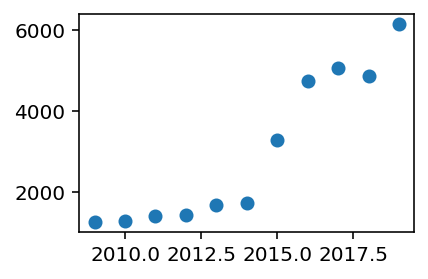

In [100]:
fig, ax = plt.subplots(figsize = (3, 2))

ax.scatter(df["year"].unique(), df.groupby("year").mean()["donations"])

plt.show()

In [104]:
np.sum(df.groupby('country').sum()['donations']==0)

86

In [116]:
df[(df['year']>=2010)&(df['year']<=2012)].groupby(['country']).mean()["donations"].sort_values(ascending=False).index[0]

'United States of America'

In [117]:
def fetch(x):
    return df[x]
fetch('donations')

0           0
1           0
2           0
3           0
4           0
        ...  
1593       12
1594     5485
1595    27994
1596    61431
1597     7607
Name: donations, Length: 1598, dtype: int64

In [118]:
df['donations']

0           0
1           0
2           0
3           0
4           0
        ...  
1593       12
1594     5485
1595    27994
1596    61431
1597     7607
Name: donations, Length: 1598, dtype: int64

In [127]:
df[(df['year']>=2010)&(df['year']<=2012)].groupby(['country']).mean()["donations"].sort_values(ascending=False)

country
United States of America    70283.000000
Brazil                      17896.666667
China                       15548.000000
France                      12487.333333
Germany                     11529.000000
                                ...     
Namibia                         0.000000
Nauru                           0.000000
Niger                           0.000000
Niue                            0.000000
Afghanistan                     0.000000
Name: donations, Length: 194, dtype: float64